<a href="https://colab.research.google.com/github/athens-igg/training_NN/blob/main/training_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [4]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

100%|██████████| 9.91M/9.91M [00:01<00:00, 5.46MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 161kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.51MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 4.64MB/s]


In [5]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = SimpleNN()

In [6]:
criterion = nn.CrossEntropyLoss()

optimizer = optim.Adam(model.parameters(), lr=0.001)

In [7]:
train_losses = []

num_epochs = 5
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, (images, labels) in enumerate(trainloader, 0):
        if torch.cuda.is_available():
            images, labels = images.cuda(), labels.cuda()
            model.cuda()
        else:
            model.cpu()

        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if i % 200 == 99:
            print(f"[Epoch {epoch+1}, Batch {i+1}] Loss: {running_loss / 100:.4f}")
            running_loss = 0.0

    train_losses.append(running_loss / len(trainloader))

[Epoch 1, Batch 100] Loss: 0.8895
[Epoch 1, Batch 300] Loss: 0.8050
[Epoch 1, Batch 500] Loss: 0.7171
[Epoch 1, Batch 700] Loss: 0.6219
[Epoch 1, Batch 900] Loss: 0.5654
[Epoch 2, Batch 100] Loss: 0.2544
[Epoch 2, Batch 300] Loss: 0.4463
[Epoch 2, Batch 500] Loss: 0.4065
[Epoch 2, Batch 700] Loss: 0.4036
[Epoch 2, Batch 900] Loss: 0.3671
[Epoch 3, Batch 100] Loss: 0.1679
[Epoch 3, Batch 300] Loss: 0.3157
[Epoch 3, Batch 500] Loss: 0.2758
[Epoch 3, Batch 700] Loss: 0.2996
[Epoch 3, Batch 900] Loss: 0.2696
[Epoch 4, Batch 100] Loss: 0.1142
[Epoch 4, Batch 300] Loss: 0.2514
[Epoch 4, Batch 500] Loss: 0.2354
[Epoch 4, Batch 700] Loss: 0.2518
[Epoch 4, Batch 900] Loss: 0.2272
[Epoch 5, Batch 100] Loss: 0.1008
[Epoch 5, Batch 300] Loss: 0.2096
[Epoch 5, Batch 500] Loss: 0.1890
[Epoch 5, Batch 700] Loss: 0.2011
[Epoch 5, Batch 900] Loss: 0.2246


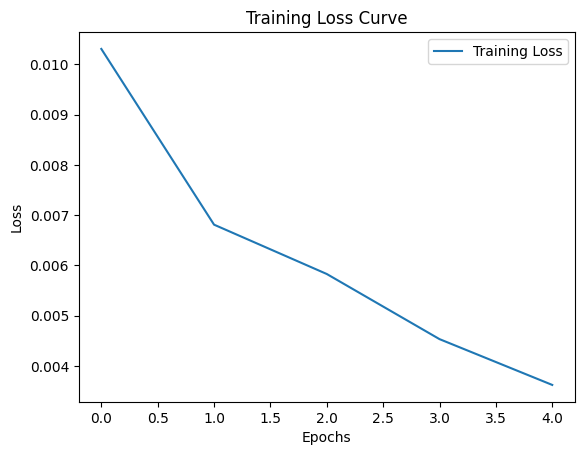

In [8]:
plt.plot(train_losses, label="Training Loss")
plt.title('Training Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [9]:
correct = 0
total = 0

model.eval()

with torch.no_grad():
    for images, labels in testloader:
        if torch.cuda.is_available():
            images, labels = images.cuda(), labels.cuda()
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")

Test Accuracy: 96.78%
